## PyCon 2018 
### workshop by Kevin Markham *(founder of dataschool.io)*

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
cwd = os.getcwd()

In [5]:
print(cwd)

/Users/steven/Documents/Python_files/PyCon 2018, pandas markham/Practice


In [6]:
ls ../

Practice/       README.md*      police.csv*     ted.csv*        tutorial.ipynb*


### 'Stanford Open Policing Project'    // dataset 1

 *`police.csv` is the Rhode Island dataset from the [Stanford Open Policing Project](https://openpolicing.stanford.edu/), made available under the [Open Data Commons Attribution License](https://opendatacommons.org/licenses/by/summary/).*
 
// * `ted.csv` is the TED Talks dataset from [Kaggle Datasets](https://www.kaggle.com/rounakbanik/ted-talks), made available under the [CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).*

In [7]:
df = pd.read_csv('../police.csv')

// *added the ../ to go back in folder structure to get to the csv file*

In [8]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [9]:
df.shape

(91741, 15)

In [10]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### *missing values...  :*
&nbsp;


In [11]:
df.isnull().head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [12]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### find and remove column that only contains missing values

*91741 rows [df.shape], and column 'county_name' has 91741 missing values [df.isnull().sum()].*


In [13]:
df.drop('county_name', axis='columns', inplace=True)

In [14]:
df.shape

(91741, 14)

*(alternative: df.dropna(axis='columns', how='all') // drop al columns with only missing values (dropna command))*

### Do men or woman speed more often?
&nbsp;

In [15]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [16]:
df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

---

In [17]:
df[df.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [18]:
df[df.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [19]:
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

### examining relationships


*e.g. does gender affect who gets searched during a stop?*


In [20]:
df.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

*(alternative: df.groupby('driver_gender').search_conducted.mean()  //possible because it is a boolean)*

In [21]:
df.groupby(['violation','driver_gender']).search_conducted.value_counts(normalize=True)

violation            driver_gender  search_conducted
Equipment            F              False               0.957378
                                    True                0.042622
                     M              False               0.929919
                                    True                0.070081
Moving violation     F              False               0.963795
                                    True                0.036205
                     M              False               0.940169
                                    True                0.059831
Other                F              False               0.943478
                                    True                0.056522
                     M              False               0.952854
                                    True                0.047146
Registration/plates  F              False               0.933860
                                    True                0.066140
                     M              F

### *(4. handling missing values)*

Is is possible that search_type is so often missing, because the search (dependency) has not been performed...?


In [22]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [23]:
# same number as search type missing..

In [24]:
df[df.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [25]:
#empty, so this means each time search_conducted is empty, search_type is NaN. Nan here is dropped automatically by pandas.

In [26]:
#to make the NaN show in valuecount;
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

## strings

*During a search, how often is the driver frisked* </br>

*caveat; frisking is in multiple categories..*

In [27]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Fris

In [28]:
#create new column
df['frisk']=df.search_type.str.contains('Frisk')
#   *.str.contains() does the magic

In [29]:
df.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [30]:
df.frisk.sum()

274

In [31]:
df.frisk.mean()     #from all trues (people stopped) precentage of frisks...

0.085732165206508129

In [32]:
#check frisk column first 3 rows.   df.frisk.head(3)

### 6. Which year had least number of stops?

In [33]:
# df.groupby('year..').value_counts etc    but first create 'year by stripping from date.. (slice)


In [34]:
df['year']=df.stop_date.str.slice(0, 4)

In [35]:
df.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005


In [36]:
df.groupby('year').search_conducted.value_counts()

year  search_conducted
2005  False                2430
      True                  128
2006  False               10232
      True                  407
2007  False                9112
      True                  364
2008  False                8458
      True                  294
2009  False                7527
      True                  381
2010  False                7271
      True                  290
2011  False                7850
      True                  276
2012  False               10616
      True                  354
2013  False                7719
      True                  205
2014  False                8964
      True                  264
2015  False                8366
      True                  233
Name: search_conducted, dtype: int64

In [37]:
# -> 2012

In [38]:
# better way: (kevin markham)
df.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [39]:
#done

In [40]:
combined = df.stop_date.str.cat(df.stop_time, sep=' ')

In [41]:
combined.head(3)

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
Name: stop_date, dtype: object

In [42]:
df['stop_datetime']= pd.to_datetime(combined)

In [43]:
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
year                          object
stop_datetime         datetime64[ns]
dtype: object

In [44]:
# because 'datetime' is magic..(recoginzes 'year', month etc);
df.stop_datetime.dt.year.value_counts()


2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [45]:
#nts: datetime does not need time, but is for rest of excercise..

## how does drug activity change by time of day?

In [46]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,year,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-03-14 10:00:00


In [47]:
df.drugs_related_stop.mean()

0.008883705213590434

In [48]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

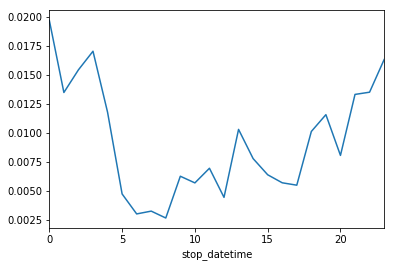

In [49]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

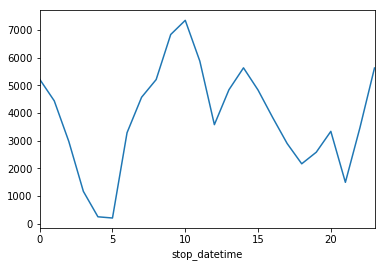

In [50]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.count().plot()

## 8. Do most stops occur at night?

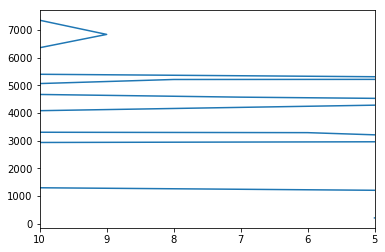

In [51]:
df.stop_datetime.dt.hour.value_counts().plot()

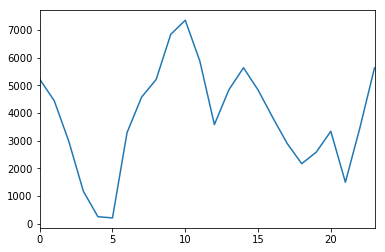

In [52]:
#fix the plot
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [53]:
#alternatively;
#df.groupby(df.stop_datetime.dt.hour).stop_date.count().plot()

## 10. Fixing bad data
regarding stop_duration feature (bad data is not missing data, it is 'erroneous' data)

In [56]:
df.stop_duration.head()

0     0-15 Min
1     0-15 Min
2     0-15 Min
3    16-30 Min
4     0-15 Min
Name: stop_duration, dtype: object

In [57]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [ ]:
# df.[(df.stop_duration == '1') | (df.stop_duration == '2')].stop_duration = NaN  , Does not work:

In [73]:
df.loc[(df.stop_duration == '1') | (df.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [74]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [75]:
import numpy as np

In [77]:
df.loc[df.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [78]:
df.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [79]:
#alternative method
#df.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)